# PortFolio Project #1

<h1 style="text-align: center;">Video Games Review and User Rating Analysis: Predicting User's Rating based on Games' features</h1>

<h2 style="text-align: center;">By Tyler Lee</h2>

<h6 style="text-align: center;">Github URL = https://github.com/TylerKoN</h6>
<h6 style="text-align: center;">LinkedIn URL = https://www.linkedin.com/in/leeangren/</h6>

<h4 style="text-align: center;">November, 2024</h4>

___

<h3 style="text-align: center;">The current project's dataset was acquired from: Kaggle</h3>

<h5 style="text-align: center;">credits for dataset: Jahnavi Paliwal from Kaggle</h5>

<h6 style="text-align: center;">Dataset URL = https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings</h6>

##### Descriptions:

The current dataset comprises over 47000 rows of detailed, game-specific information, featuring some of the most iconic and widely acclaimed video games in history. It includes classics such as Super Mario Odyssey and Tetris, alongside modern blockbusters like FIFA 24, Red Dead Redemption 2, and Fortnite. This extensive dataset offers valuable opportunities for experimentation, analysis, and the development of advanced machine learning models, catering to both gaming enthusiasts and data science practitioners. 

*Note: The current dataset is a randomly generated dataset that mimics real-world datasets to assist with data science practice, the real data for video games review may have a different outcome.*

###### *Referenced from original source.*

___

### Importing Packages and Reading Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Reading dataset into DataFrame
df = pd.read_csv('video_game_reviews.csv')
df.head(5)

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [3]:
# Displaying DataTypes, Informations, and Descriptive Statistics of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [4]:
df.describe()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


#### Checking for Missing values

In [5]:
print(df.isnull().sum())

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64


___

### Exploratory Data Analysis with Data Visualizations

#### Distribution of User Ratings

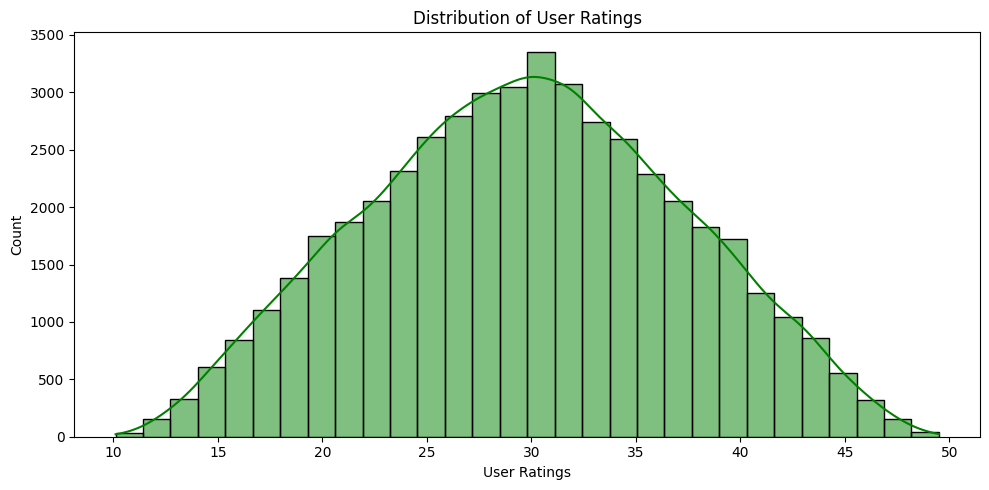

In [6]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'User Rating', bins = 30, kde = True, color = 'g', edgecolor = 'black')

plt.title('Distribution of User Ratings')
plt.xlabel('User Ratings')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

User Rating of the video games are appeared to be normally distributed

#### Line Plot of Number of games released each year from 2010

In [7]:
release_per_year = df['Release Year'].value_counts().sort_index()

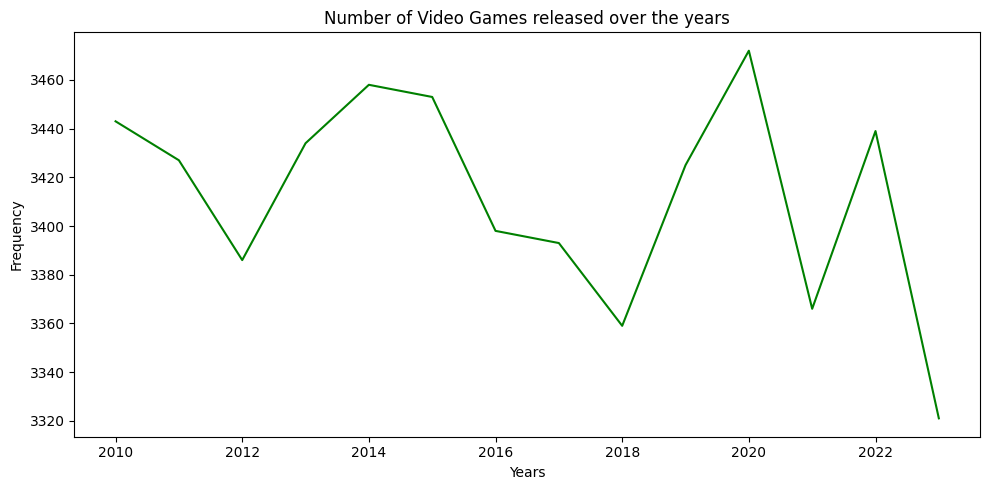

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(release_per_year.index, release_per_year.values, linestyle='-', color='green')

plt.title('Number of Video Games released over the years')
plt.xlabel('Years')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The trend of video games release from 2010 to 2022 maintained around at least 3300 games per year. This shows the vast popularity in video games development, publishing, and video games player in general for the current century

#### The Graphics Quality of Video Games over the year (Has it impacted Users' Rating?)

In [9]:
# Checking Graphics Quality Columns' Data Type
print('The Data Type of the Graphics Quality Columns is:', df['Graphics Quality'].dtypes)

# Checking Graphics Quality Columns' values
print(df['Graphics Quality'].value_counts())

The Data Type of the Graphics Quality Columns is: object
Graphics Quality
High      12113
Medium    12040
Ultra     11811
Low       11810
Name: count, dtype: int64


In [10]:
# Encoding Graphics Quality to Ordinal value as it is currently an object data type
graphics_quality_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Ultra': 4}
df['Graphics Quality (Encoded)'] = df['Graphics Quality'].map(graphics_quality_map)

# Checking the Encoded Graphics Quality Columns
print(df['Graphics Quality (Encoded)'].value_counts())

Graphics Quality (Encoded)
3    12113
2    12040
4    11811
1    11810
Name: count, dtype: int64


In [11]:
# Grouping by Release Year and calculate the mean of graphics quality
graphics_quality_over_years = df.groupby('Release Year')['Graphics Quality (Encoded)'].mean()

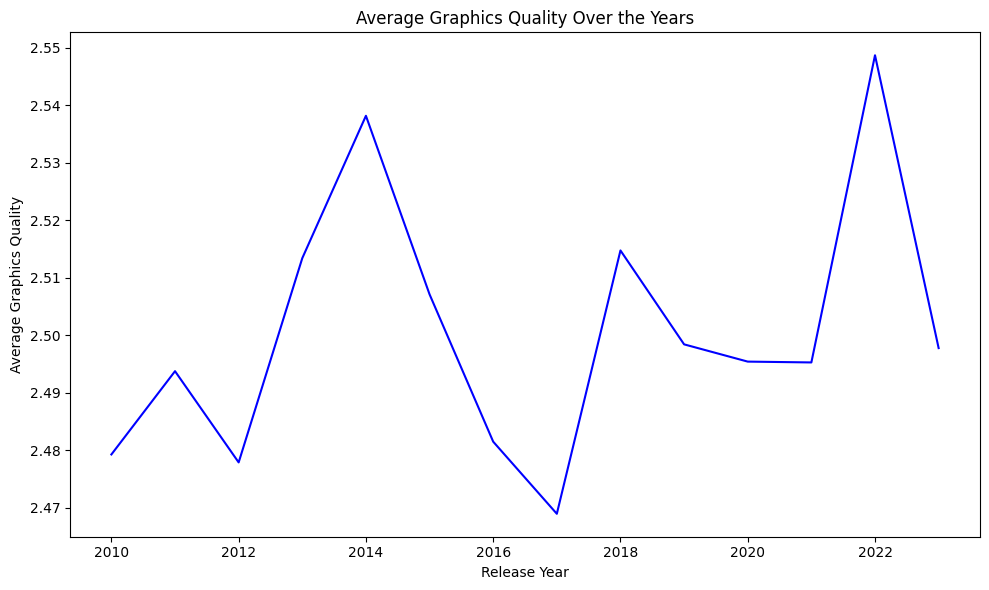

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(graphics_quality_over_years.index, graphics_quality_over_years.values, linestyle='-', color='blue')

plt.title('Average Graphics Quality Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Graphics Quality')

plt.tight_layout()
plt.show()

We can see a clear trend of Graphics Quality improvements from the year 2010 to 2014, with the values then dropped significantly from there on, then improved again from 2018 onwards. 

This could mean that the users' expectations of Graphics Quality were raised as such that it may have potentially impacted the users' rating of graphics quality for video games released after 2014, Games with medium or high graphics from 2010 released during 2014 to 2017 could have been rated as low graphics by users due to the increasing expectations of Graphics Quality. 

This may have further resulted in an increased frequency of Graphics Demanding Video Games release from 2018 onwards.

#### Distribution of genres for the video games

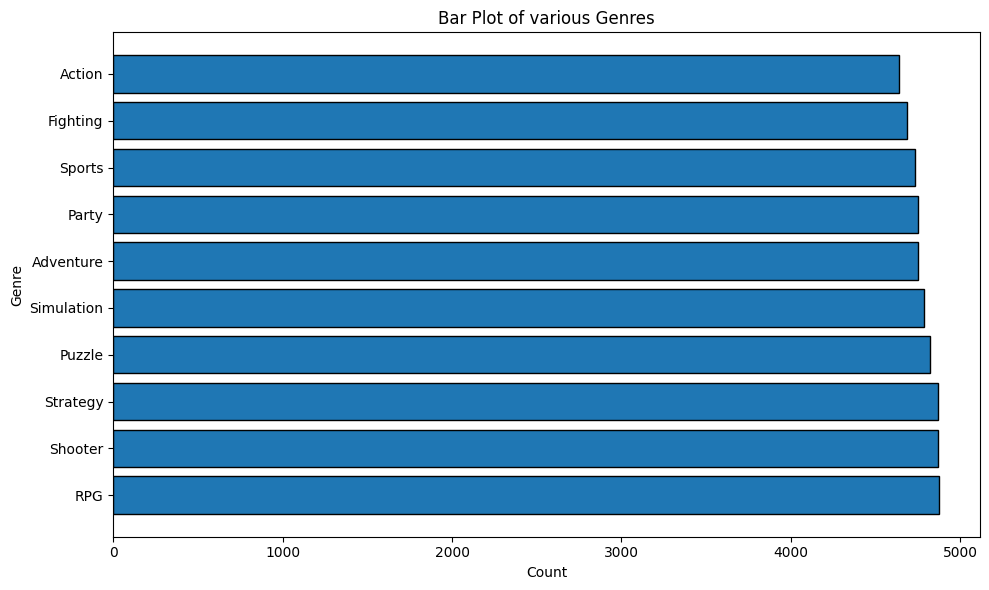

In [13]:
plt.figure(figsize=(10, 6))

# Counts for each Genre
genre = df['Genre'].value_counts()

# Creating a horizontal bar plot
plt.barh(genre.index, genre.values, edgecolor = 'black')
plt.title('Bar Plot of various Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

According to the Bar plot above, we can see that RPG, Shooter, and Strategy games were the most published video games while Action genre were the least published genre.

#### Does requirement of special devices impact the average user ratings?

In [14]:
# Encoding Requires Special Device Column to Numeric type and grouping them by User Ratings
special_device_map = {'Yes': 1, 'No': 0}
df['Requires Special Device (Encoded)'] = df['Requires Special Device'].map(special_device_map)
ratings_by_device = df.groupby('Requires Special Device (Encoded)')['User Rating'].mean()

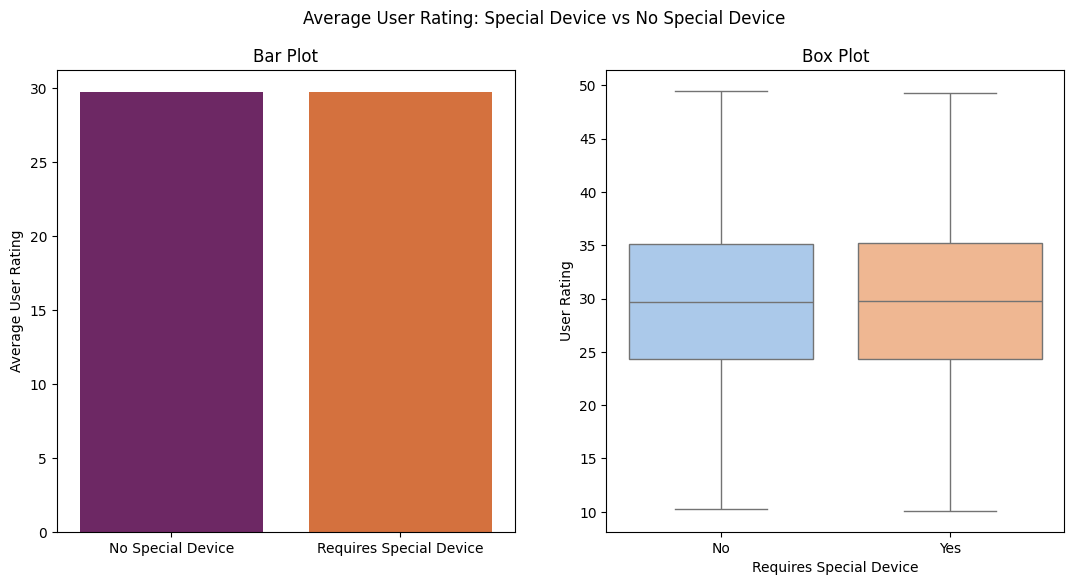

In [15]:
# Plotting the Graphs to visualize the effects
plt.figure(figsize=(13, 6))

# Subplot 1: Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x=['No Special Device', 'Requires Special Device'], y=ratings_by_device.values, palette='inferno')
plt.title('Bar Plot')
plt.ylabel('Average User Rating')

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Requires Special Device', y='User Rating', data=df, palette='pastel')
plt.title('Box Plot')
plt.xlabel('Requires Special Device')
plt.ylabel('User Rating')

# Title for the Subplots
plt.suptitle('Average User Rating: Special Device vs No Special Device')

plt.show()

Based on the visualiztions, it is clear that the user ratings of video games were unaffected by the requirements of special devices for video games. 

#### Measuring Relationship between Price and User Rating

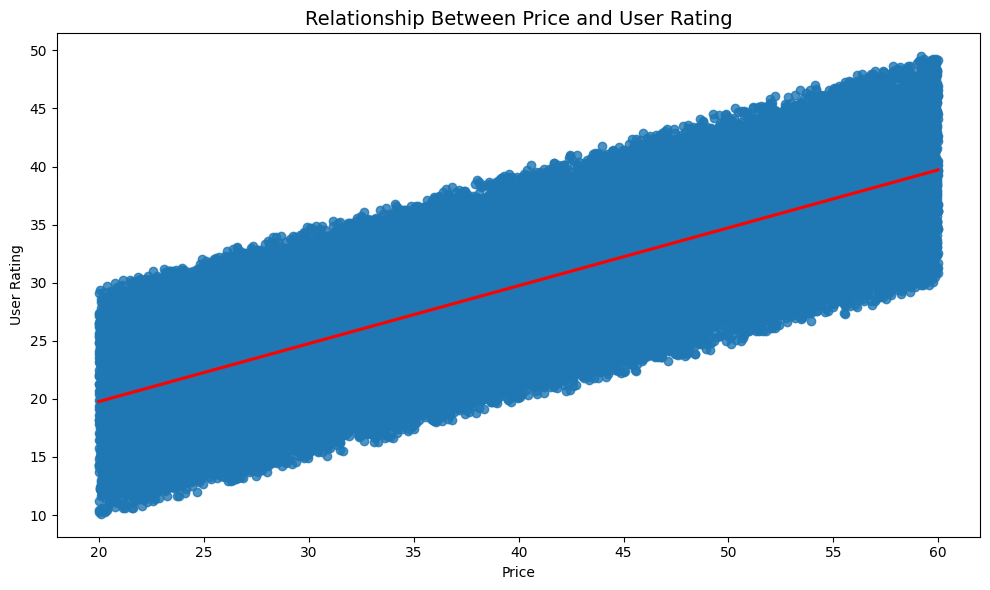

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Price', y='User Rating', data=df, line_kws={'color': 'red'})
plt.title('Relationship Between Price and User Rating', fontsize=14)
plt.xlabel('Price')
plt.ylabel('User Rating')

# Show the plot
plt.tight_layout()
plt.show()

It appears that Price and User Rating has a positive relationship, though it is clear that the variability suggested a rather noisy relationship

#### Does various qualities of game increases their distributed price? 

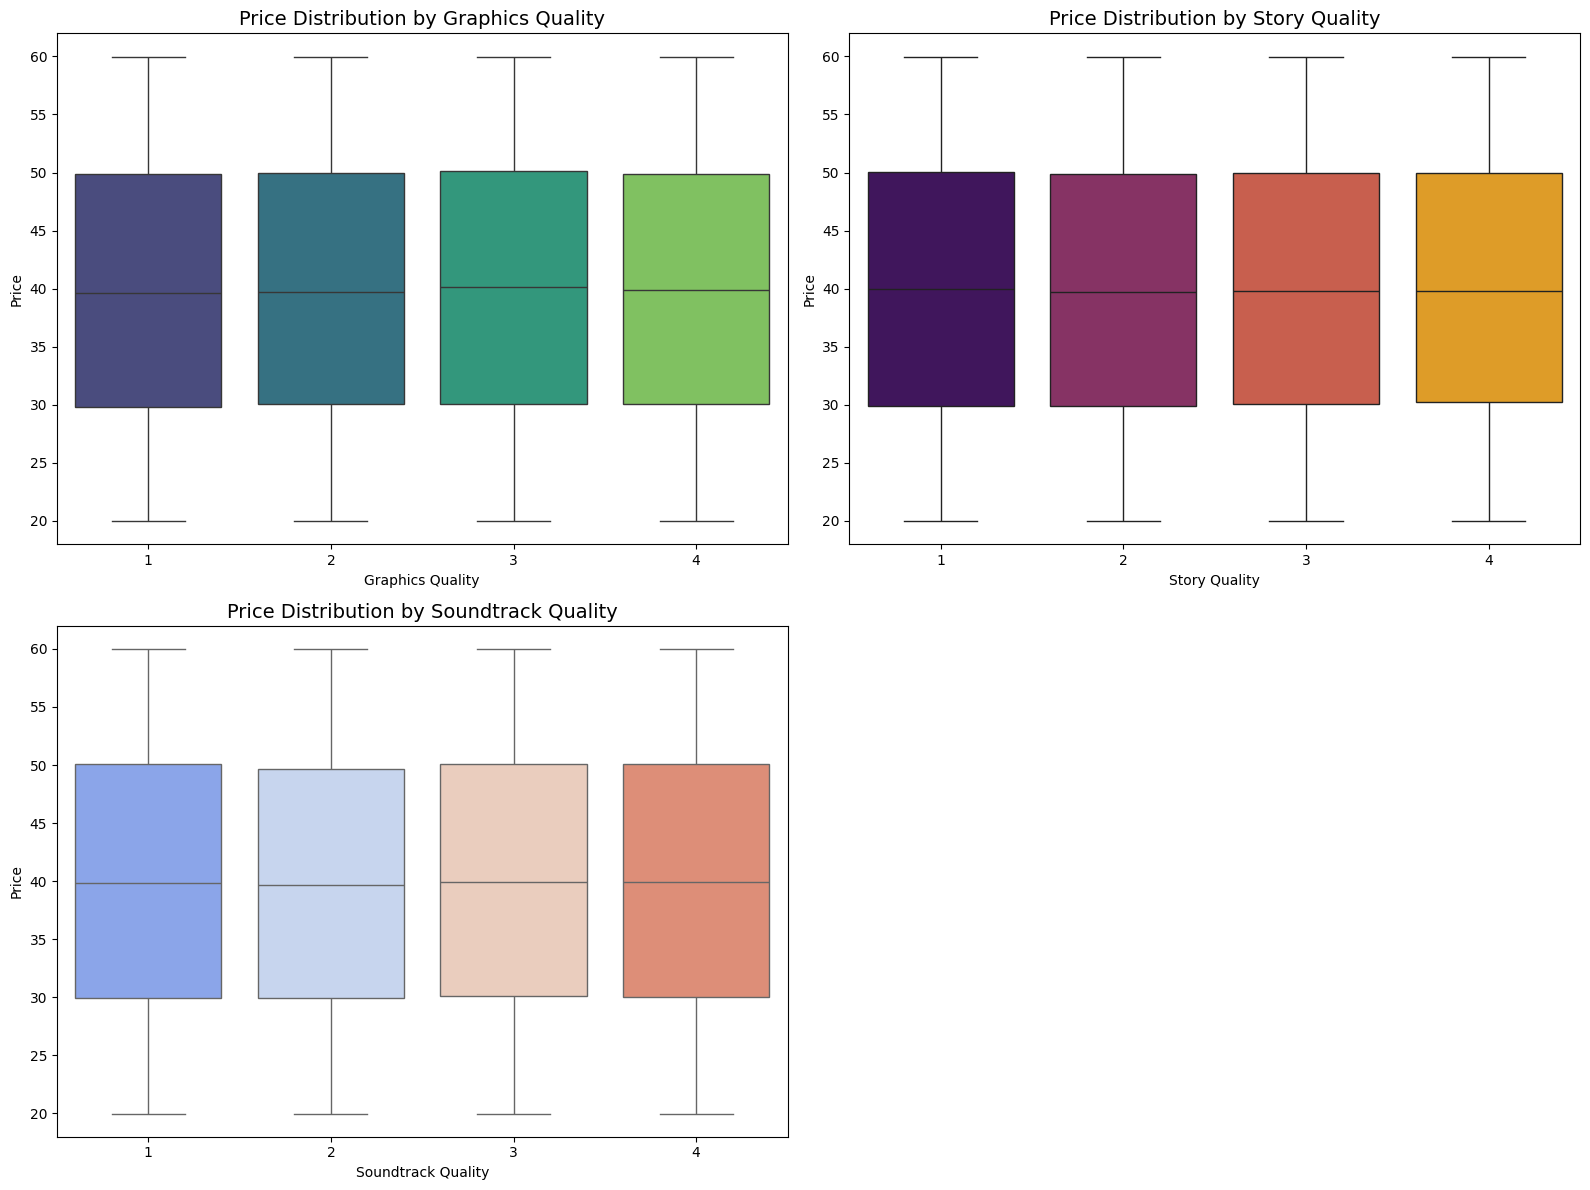

In [17]:
# Convert categorical quality variables to numerical using ordinal encoding
quality_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}

df['Story Quality (Encoded)'] = df['Story Quality'].map(quality_mapping)
df['Soundtrack Quality (Encoded)'] = df['Soundtrack Quality'].map(quality_mapping)

plt.figure(figsize=(16, 12))

# Subplot 1: Graphics Quality vs Price
plt.subplot(2, 2, 1)
sns.boxplot(x='Graphics Quality (Encoded)', y='Price', data=df, palette='viridis')
plt.title('Price Distribution by Graphics Quality', fontsize=14)
plt.xlabel('Graphics Quality')
plt.ylabel('Price')

# Subplot 2: Story Quality vs Price
plt.subplot(2, 2, 2)
sns.boxplot(x='Story Quality (Encoded)', y='Price', data=df, palette='inferno')
plt.title('Price Distribution by Story Quality', fontsize=14)
plt.xlabel('Story Quality')
plt.ylabel('Price')

# Subplot 3: Soundtrack Quality vs Price
plt.subplot(2, 2, 3)
sns.boxplot(x='Soundtrack Quality (Encoded)', y='Price', data=df, palette='coolwarm')
plt.title('Price Distribution by Soundtrack Quality', fontsize=14)
plt.xlabel('Soundtrack Quality')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

Based on the subplots of Boxplots above, it is shown that the qualities of video games does not necessary indicate an increase in price, though some may appear just slightly higher or lower, it does not really display any clear differences with other qualities of other video games.

#### Measuring Games' Quality and their user rating (Does Qualities of Game impact the overall user ratings?)

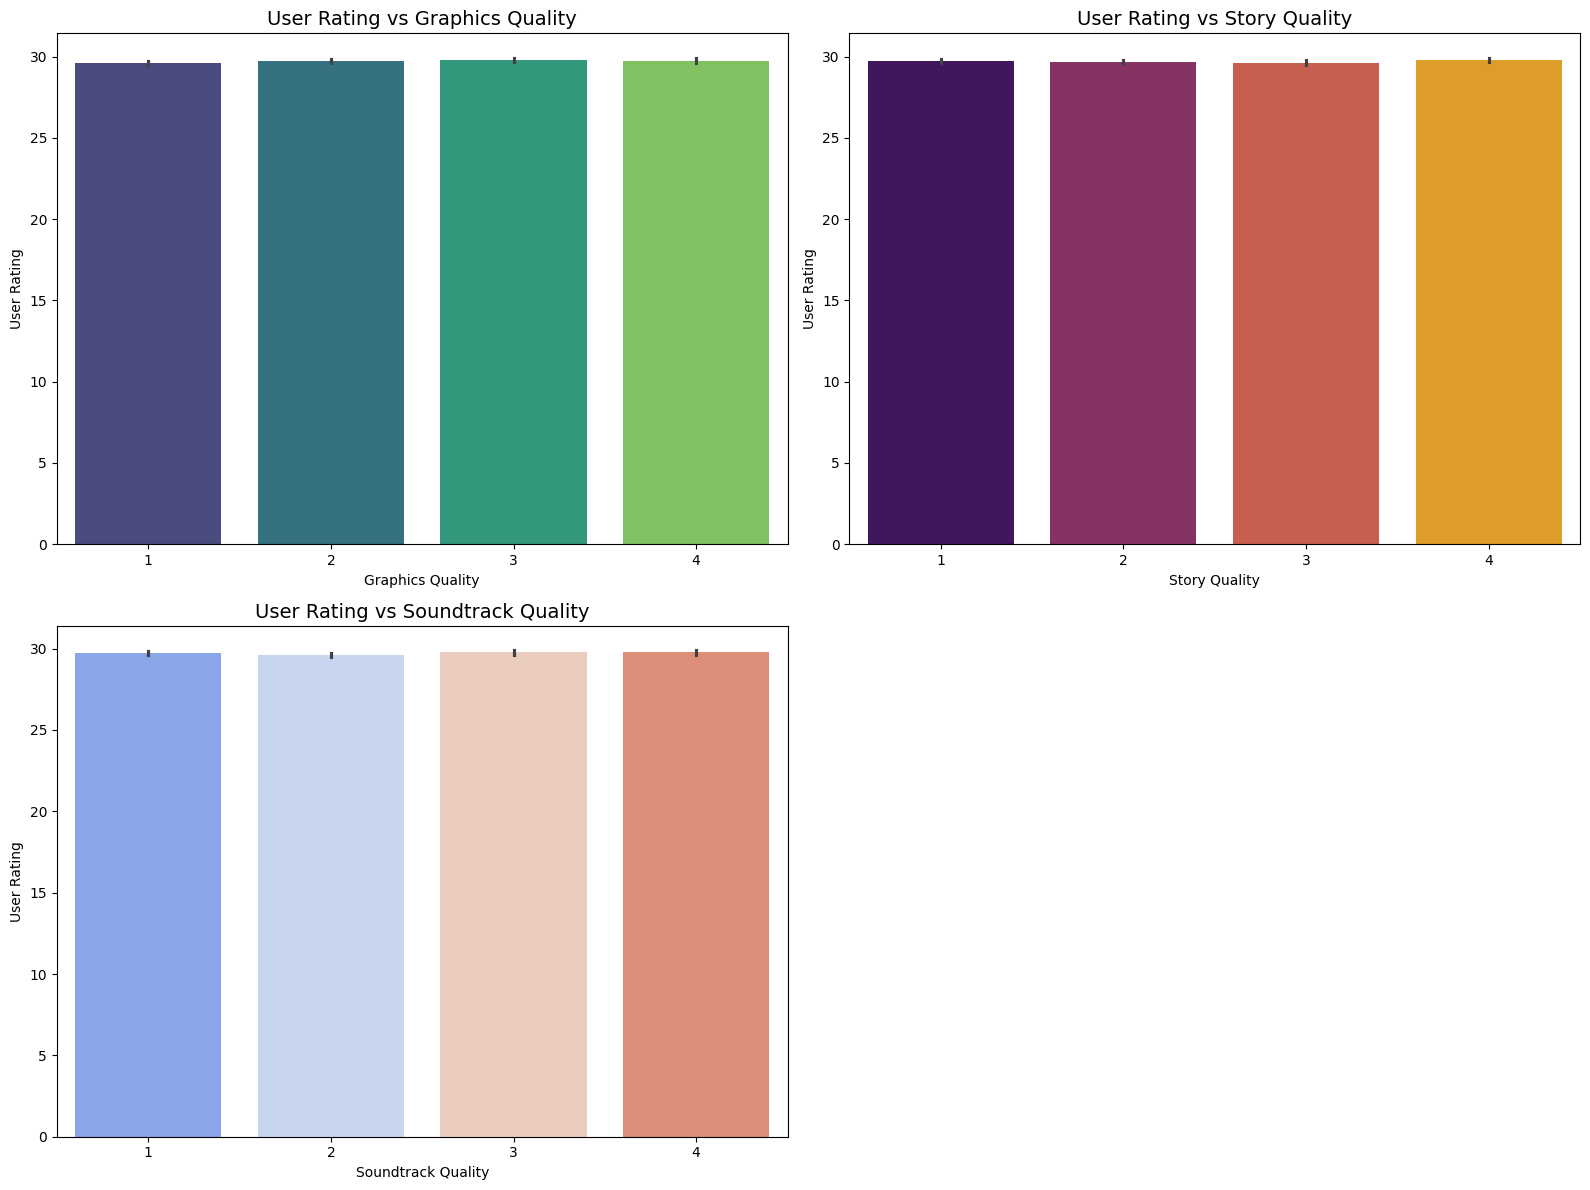

In [18]:
plt.figure(figsize=(16, 12))

# Subplot 1: Graphics Quality vs User Rating
plt.subplot(2, 2, 1)
sns.barplot(x='Graphics Quality (Encoded)', y='User Rating', data=df, palette='viridis')
plt.title('User Rating vs Graphics Quality', fontsize=14)
plt.xlabel('Graphics Quality')
plt.ylabel('User Rating')

# Subplot 2: Story Quality vs User Rating
plt.subplot(2, 2, 2)
sns.barplot(x='Story Quality (Encoded)', y='User Rating', data=df, palette='inferno')
plt.title('User Rating vs Story Quality', fontsize=14)
plt.xlabel('Story Quality')
plt.ylabel('User Rating')

# Subplot 3: Soundtrack Quality vs User Rating
plt.subplot(2, 2, 3)
sns.barplot(x='Soundtrack Quality (Encoded)', y='User Rating', data=df, palette='coolwarm')
plt.title('User Rating vs Soundtrack Quality', fontsize=14)
plt.xlabel('Soundtrack Quality')
plt.ylabel('User Rating')

plt.tight_layout()
plt.show()

As similar to Price, the qualities of video games does not seem to have a clear image and difference that has any impact on the Users' Rating, with only minor differences that does not result in any clear differences.

#### Measuring Correlations between Numerical Columns and User Rating (Including Qualities of Games for further analysis)

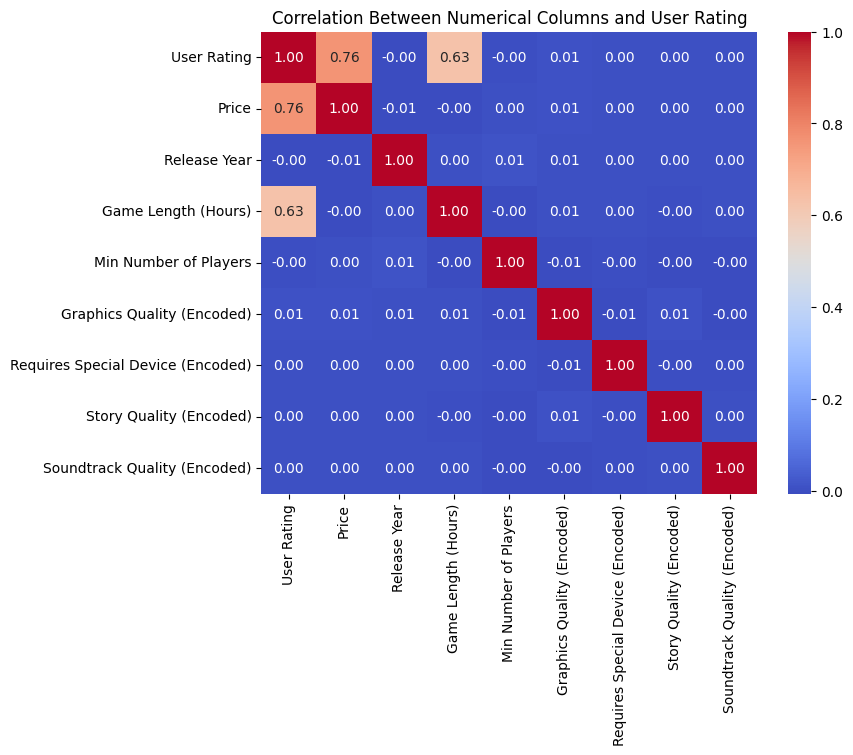

In [19]:
matrix_columns = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = matrix_columns.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Numerical Columns and User Rating')
plt.show()

Based on the correlation matrix heatmap, it seems that only Price and Game Length may have potential correlations with User Rating. 

___

### Building Machine Learning Models

Going back to the original purpose of the current project, we want to build a machine learning model that will be able to predict Users' Rating based on the features provided by the dataset. For that, we will drop columns with complex "object" data types and potential unrelated data *(data with no potential effects)* to ease the process in building the machine learning models.

Since some "object" data were catagorical data that may potentially be helpful in predicting Users' Rating as well, such as Games' qualities, Genre, and Platforms. These particular columns will remain in the processed dataset with them being encoded with one-hot encoding, and with columns like Game Mode and Requires Special Device being Label Encoded as the values of these columns only has two different outcomes.

Furthermore, as the Games' qualities does not clearly show any ordinal relationship *(based on the boxplot above)*, the qualities columns would be implemented with one-hot encoding method as well. 

In [20]:
columns_to_drop = ['User Review Text', 'Release Year', 'Game Title', 'Multiplayer', 'Min Number of Players']
df_processed = df.drop(columns=columns_to_drop)

# Label encoding 
label_encoder = LabelEncoder()
columns_to_label_encode = ['Requires Special Device', 'Game Mode']
for col in columns_to_label_encode:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])

# One-hot encoding for categorical columns
columns_to_one_hot_encode = [
    'Age Group Targeted',
    'Platform',
    'Developer',
    'Publisher',
    'Genre',
    'Graphics Quality',
    'Soundtrack Quality',
    'Story Quality'
]

df_processed = pd.get_dummies(df_processed, columns=columns_to_one_hot_encode, drop_first=True)

In [21]:
X = df_processed.drop('User Rating', axis=1)  # Features
y = df_processed['User Rating']  # Target

# Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_performance = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [23]:
# Evaluating Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)
model_performance['Linear Regression'] = {'RMSE': lr_rmse, 'R^2': lr_r2}

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Linear Regression R²: {lr_r2:.4f}")

Linear Regression RMSE: 1.1578
Linear Regression R²: 0.9768


In [24]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [25]:
# Evaluating Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
model_performance['Random Forest'] = {'RMSE': rf_rmse, 'R^2': rf_r2}

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")

Random Forest RMSE: 1.2094
Random Forest R²: 0.9747


In [26]:
# Display Overall Model Performance
print("Model Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} -> RMSE: {metrics['RMSE']:.4f}, R²: {metrics['R^2']:.4f}")

Model Performance Summary:
Linear Regression -> RMSE: 1.1578, R²: 0.9768
Random Forest -> RMSE: 1.2094, R²: 0.9747


Based on the results of the model training, it appears that Linear Regression have performed better than RandomForest Regressor in this case, though both have a similar value of results, The R2 score of Linear Regression has shown an upper hand in this case. We can try to further tune parameters of Random Forest.

___

#### Implementing RandomizedSearchCV on RandomForest Regressor

As Random Forest appears to have a similar result with the Linear Regression model, we can attempt to tune RandomForest Regressors' parameters to see if the model has better potential than the Linear Regression model.

*The implication behind the utilization of RandomizedSearchCV instead of GridSearchCV was that since the dataset were considered a relatively large dataset, it is not feasible to explore all possible combinations, hence the usage of RandomizedSearchCV instead of GridSearchCV.*

In [27]:
# Random Forest parameters for RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

# RandomizedSearchCV results
y_pred_rf_random = rf_random.best_estimator_.predict(X_test)
rf_random_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_random))
rf_random_r2 = r2_score(y_test, y_pred_rf_random)
model_performance['RandomizedSearchCV RF'] = {'RMSE': rf_random_rmse, 'R^2': rf_random_r2}

print(f"Best Parameters: {rf_random.best_params_}")
print(f"RandomizedSearchCV RandomForest RMSE: {rf_random_rmse:.4f}")
print(f"RandomizedSearchCV RandomForest R²: {rf_random_r2:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
RandomizedSearchCV RandomForest RMSE: 1.1794
RandomizedSearchCV RandomForest R²: 0.9760


___

### Conclusion

In [28]:
print("Model Performance Summary:")
for model, metrics in model_performance.items():
    print(f"{model} -> RMSE: {metrics['RMSE']:.4f}, R²: {metrics['R^2']:.4f}")

Model Performance Summary:
Linear Regression -> RMSE: 1.1578, R²: 0.9768
Random Forest -> RMSE: 1.2094, R²: 0.9747
RandomizedSearchCV RF -> RMSE: 1.1794, R²: 0.9760


***Based on the output above, the R2 score of Random Forest has improved with the implementation of RandomizedSearchCV. However, the Linear Regression model from Earlier still has an upper hand in terms of their r2 score, making Linear Regression the best model for this particular dataset to predict User Rating.***

#### Scatterplot to Visualize Models' performance

##### Function to Create Predicted Values vs Actual Values Scatterplots

In [40]:
def plot_pred(y_test, y_preds, model_name):

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_preds, alpha=0.6, label=f"{model_name} Predictions", color="blue")
    sns.lineplot(x=y_test, y=y_test, color="red", label="True Values")
    plt.title(f"Predictions vs Actual Values ({model_name})")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()

##### Scatterplots

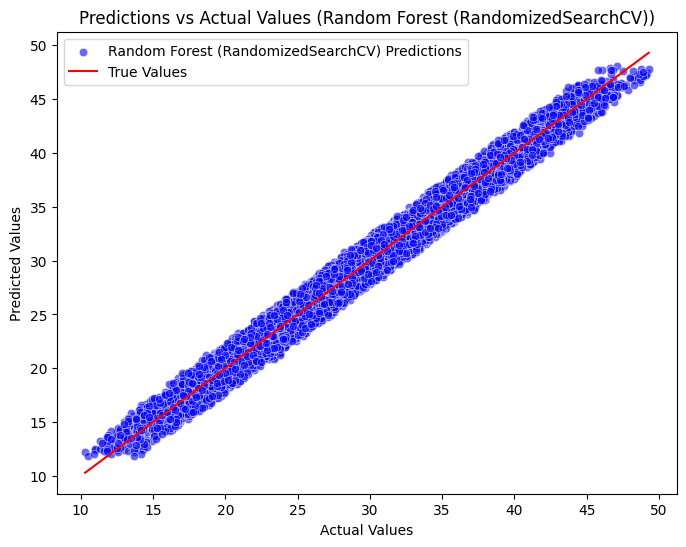

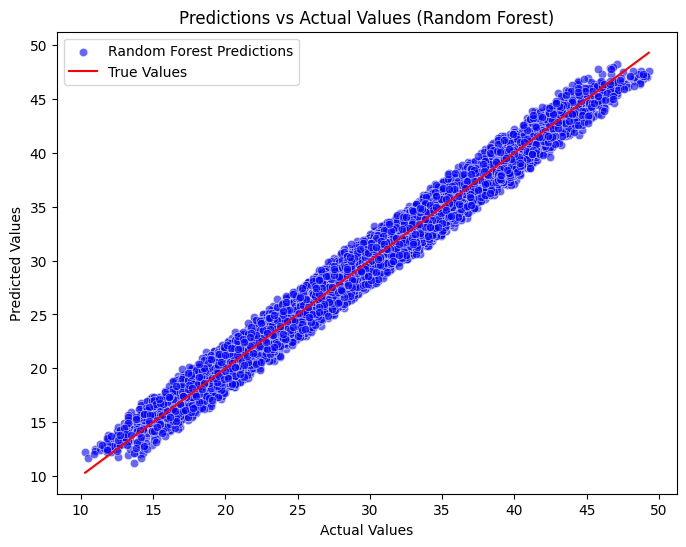

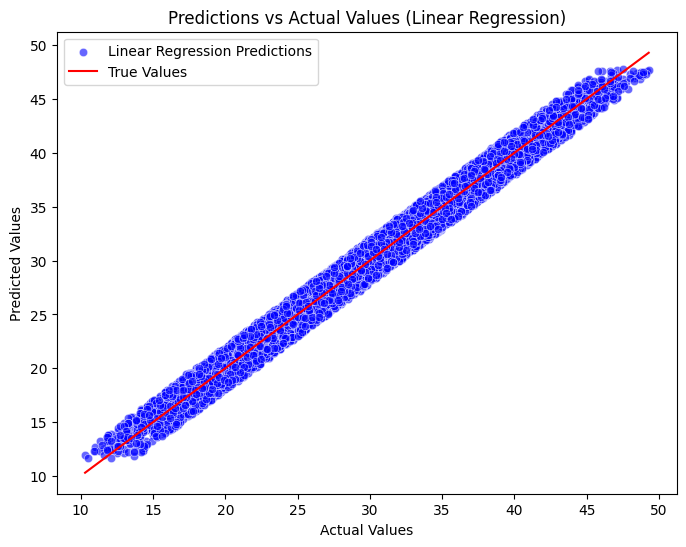

In [41]:
# Random Forest with RandomizedSearchCV
plot_pred(y_test, y_pred_rf_random, "Random Forest (RandomizedSearchCV)")

# Random Forest
plot_pred(y_test, y_pred_rf, "Random Forest")

# Linear Regression
plot_pred(y_test, y_pred_lr, "Linear Regression")

From the plot, we can see all models performed incredibly well with their predictions, in which the best model is selected with the best RMSE and R^2 Score:

The best model from this machine learning training is **Linear Regression** with ***RMSE: 1.1578, R²: 0.9768***